In [1]:
# -*- coding: utf-8 -*-
from hyperparams import Hyperparams as hp
import os
import codecs
from jamo import h2j, j2hcj
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [2]:
trascript = hp.transcript_pos
lines = codecs.open(trascript, 'r', 'utf-8').readlines()

if not (os.path.isdir(hp.mels_dir)):
    os.mkdir(hp.mels_dir)
    print('{%s} does not exist, created {%s}'.format(hp.mels_dir, hp.mels_dir))
    
if not (os.path.isdir(hp.mags_dir)):
    os.mkdir(hp.mags_dir)
    print('{%s} does not exist, created {%s}'.format(hp.mags_dir, hp.mags_dir))

In [3]:
def load_vocab():
    char2idx = {char: idx for idx, char in enumerate(hp.vocab)}
    idx2char = {idx: char for idx, char in enumerate(hp.vocab)}
    return char2idx, idx2char

In [4]:
fnames, texts, secs, text_lengths = [], [], [], []
char2idx, idx2char = load_vocab();

for line in tqdm(lines):
    line = j2hcj(line)
    fname, _, text, sec = line.strip().split('|')
    encodedText = [char2idx[char] for char in text]
    encodedText = np.array(encodedText, np.int32)#.tostring()
    fnames.append(fname); texts.append(encodedText)
    secs.append(float(sec)); text_lengths.append(len(encodedText))
    
fnames = np.asarray(fnames)
texts = np.asarray(texts)
secs = np.asarray(secs)

100%|█████████████████████████████████████████████████████████████████████████| 12853/12853 [00:01<00:00, 10277.04it/s]


In [5]:
#Random Selection
randIdx = np.random.choice(range(len(lines)), 20)
randIdx.sort()
print(randIdx)

fnames = fnames[randIdx]
texts = texts[randIdx]
secs = secs[randIdx]

[ 1438  1755  2343  2699  4380  4704  5129  5352  5922  5940  7901  8225
  8869  9218 11043 11368 11599 11599 11931 12682]


In [6]:
maxLen, minLen = max(text_lengths), min(text_lengths)

In [7]:
def spectrogram(wav, nsc, nov, fs):
    
    
    S = librosa.feature.melspectrogram(y=wav, sr=fs, n_fft=nsc, hop_length=nov, power=2.0)
    dbS = 20 * np.log10(np.maximum(S, hp.eps))
    
    
    return dbS

def mel_spectrogram(wav, nsc, nov, fs):
    
    
    S = librosa.feature.melspectrogram(y=wav, sr=fs, n_fft=nsc, hop_length=nov, power=2.0, n_mels = hp.n_mels)
    dbS = 20 * np.log10(np.maximum(S, hp.eps))
    
    
    return dbS

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

17:65
2/2_0399.wav


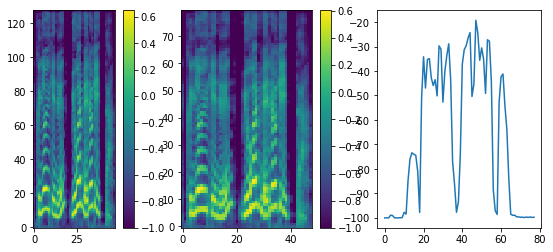

  5%|████▏                                                                              | 1/20 [00:00<00:08,  2.31it/s]

10:53
2/2_0716.wav


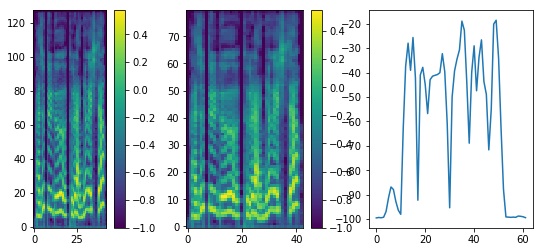

 10%|████████▎                                                                          | 2/20 [00:00<00:07,  2.33it/s]

9:67
3/3_0147.wav


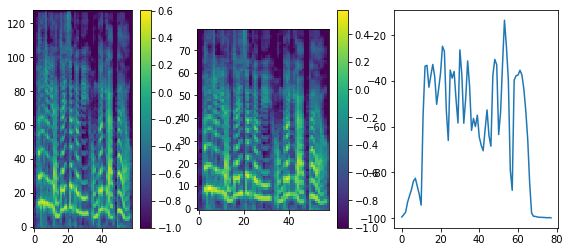

 15%|████████████▍                                                                      | 3/20 [00:01<00:07,  2.23it/s]

8:29
3/3_0503.wav


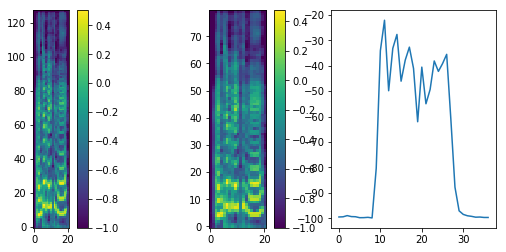

 20%|████████████████▌                                                                  | 4/20 [00:01<00:07,  2.18it/s]

22:61
3/3_2184.wav


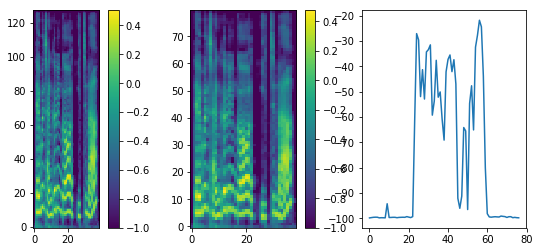

 25%|████████████████████▊                                                              | 5/20 [00:02<00:06,  2.17it/s]

15:50
3/3_2508.wav


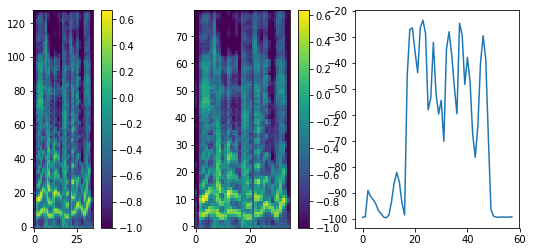

 30%|████████████████████████▉                                                          | 6/20 [00:02<00:06,  2.27it/s]

9:57
3/3_2933.wav


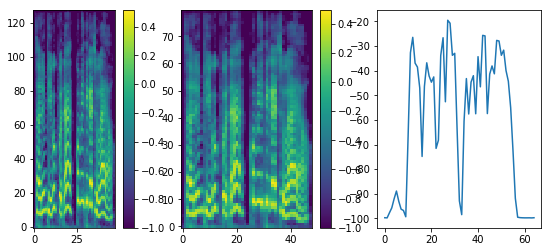

 35%|█████████████████████████████                                                      | 7/20 [00:03<00:05,  2.33it/s]

22:105
3/3_3156.wav


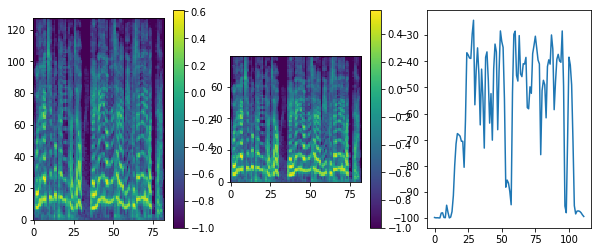

 40%|█████████████████████████████████▏                                                 | 8/20 [00:03<00:05,  2.23it/s]

13:59
3/3_3726.wav


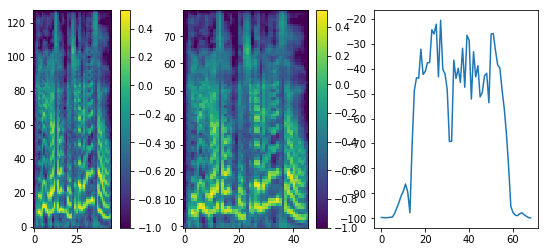

 45%|█████████████████████████████████████▎                                             | 9/20 [00:03<00:04,  2.28it/s]

17:97
3/3_3744.wav


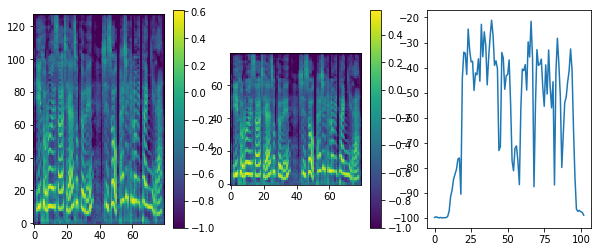

 50%|█████████████████████████████████████████                                         | 10/20 [00:04<00:04,  2.14it/s]

14:63
4/4_0680.wav


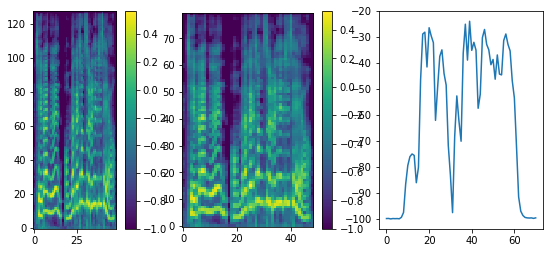

 55%|█████████████████████████████████████████████                                     | 11/20 [00:04<00:04,  2.20it/s]

8:74
4/4_1004.wav


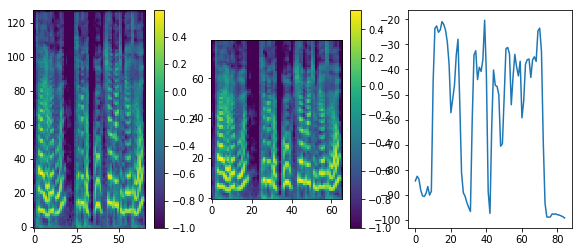

 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:05<00:03,  2.20it/s]

9:36
4/4_1648.wav


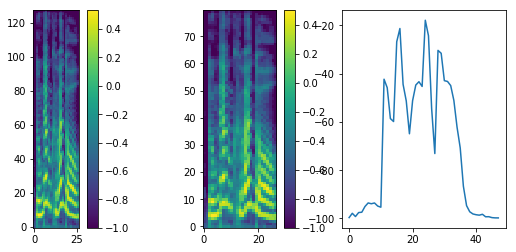

 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:05<00:02,  2.34it/s]

13:108
4/4_1997.wav


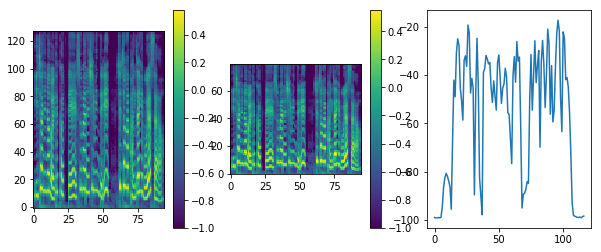

 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:06<00:02,  2.26it/s]

19:84
4/4_3822.wav


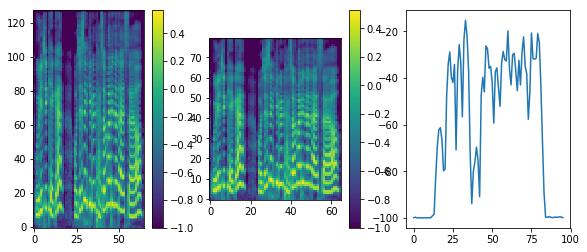

 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:06<00:02,  2.16it/s]

11:45
4/4_4147.wav


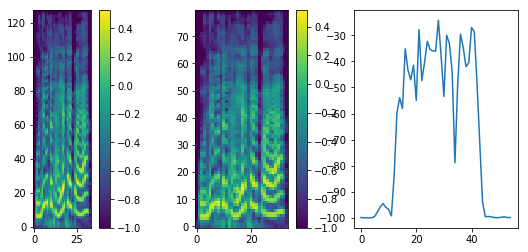

 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:07<00:01,  2.27it/s]

11:54
4/4_4378.wav


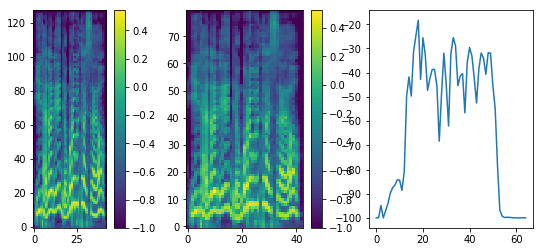

 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:07<00:01,  2.32it/s]

11:54
4/4_4378.wav


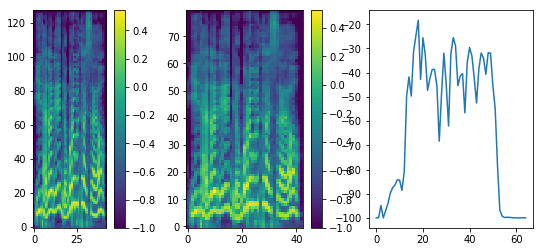

 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:07<00:00,  2.35it/s]

13:55
4/4_4710.wav


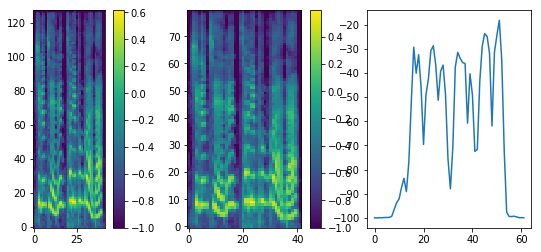

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:08<00:00,  2.38it/s]

5:69
4/4_5461.wav


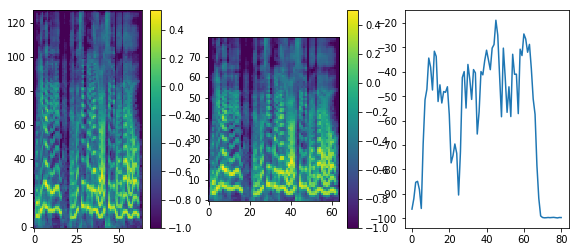

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.35it/s]


In [16]:
for i in tqdm(range(0, len(fnames))):
    fname = fnames[i]
    text = texts[i]
    
    npy_name = fname.split('/')[1].replace('wav', 'npy')
    mel_path = os.path.join(hp.mels_dir, npy_name)
    mag_path = os.path.join(hp.mags_dir, npy_name)
    
#     if os.path.isfile(mel_path) and os.path.isfile(mag_path):
    if False:
        
        mag = np.load(mag_path)
        mel = np.load(mel_path) 
        
    else :
    
        fpath = os.path.join(hp.data_dir, fname)
        wav, fs = librosa.core.load(fpath, mono=True)
        nsc = np.int(fs * hp.nsc_sec)
        nov = np.int(fs * hp.nov_sec)
        mag = spectrogram(wav, nsc, nov, fs)
        mel = mel_spectrogram(wav, nsc, nov, fs)
        mag_coef = np.mean(mag, axis=0)
        
        active = np.where(mag_coef > hp.db_limit)[0]
        
        first = active[0]
        last = active[-1] + 1
        
        if first - hp.offset >= 0:
            first = first - hp.offset
        else:
                first = 0
            
        if last + hp.offset < len(mag_coef):
            last = last + hp.offset
        else:
            last = len(mag_coef)
            
        mag = mag[:, first:last]
        mel = mel[:, first:last]
        
        mag = mag / hp.max_db
        mel = mel / hp.max_db
        
        print('{:d}:{:d}'.format(first, last))
        
        np.save(mag_path, mag)
        np.save(mel_path, mel)
    
    print(fname)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(mag, origin='lower')
    plt.colorbar()
    plt.subplot(1, 3, 2)
    plt.imshow(mel, origin='lower')
    plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.plot(mag_coef)
    plt.show()

In [17]:
mag.shape

(128, 64)

In [18]:
with tf.variable_scope("embedding", reuse=tf.AUTO_REUSE):
    lookup_table = tf.get_variable('lookup_table', 
                                   dtype=tf.float32, 
                                   shape=[len(hp.vocab), hp.embed_size],
                                   initializer=tf.truncated_normal_initializer(mean=0.0, stddev=0.01))

In [19]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
sess.run(lookup_table)

In [ ]:
embed_texts = []

for i in range(len(texts)):
    text = texts[i]
    embed_text = tf.nn.embedding_lookup(lookup_table, text)
    embed_text = tf.expand_dims(embed_text, 0)
    embed_texts.append(embed_text)

In [ ]:
embed_text

In [ ]:
lookup_table.name

In [ ]:
encodedText

In [ ]:
x = sess.run(embed_texts)

In [ ]:
plt.imshow(x[5][0, :, :])

In [ ]:
# for i in tqdm(range(len(embed_texts))):
conv_bank_results = []

for i in tqdm(range(len(embed_texts))):
    with tf.variable_scope("conv1d_banks", reuse=tf.AUTO_REUSE):
        embed_text = embed_texts[i]

        for k in range(1, hp.K + 1):
            with tf.variable_scope("filter_num_{}".format(k)):
                params = {"inputs":embed_text, "filters":hp.num_k_filter, "kernel_size":k,
                        "dilation_rate":1, "padding":"SAME", "activation":None, 
                        "use_bias":False, "reuse":tf.AUTO_REUSE}
                
                # Works when resue = True
                # For i loop, filter is reused.

                conv_outputs = tf.layers.conv1d(**params)
                if k == 1:
                    conv_bank_outputs = conv_outputs
                else:
                    conv_bank_outputs = tf.concat((conv_bank_outputs, conv_outputs), axis=2)
                
    conv_bank_results.append(conv_bank_outputs)
                
#     print(prenet_outputs)


In [ ]:
sess.run(tf.initialize_all_variables())
sess.run(conv_bank_results)